## seaborn
matplotlib 기반 통계 데이터 시각화에 최적화된 라이브러리  
실제 분석에서는 matplotlib과 seaborn을 함께 사용  

- sns.distplot(data, bins=, color=, kde=)
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# plt.rc('figure', figsize=(6,4))
import seaborn as sns

In [57]:
tips = pd.read_csv('example/tips.csv')
tips.head()
party_counts = pd.crosstab(tips['day'], tips['size'])
# size 2 ~ 5 선택
party_counts = party_counts.loc[:,2:5]
# 각 열을 합계 1로 정규화
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

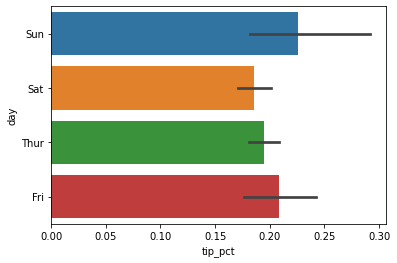

In [58]:
# 요일별 팁의 비중을 시각화
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct', y='day',data=tips, orient='h')

In [14]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

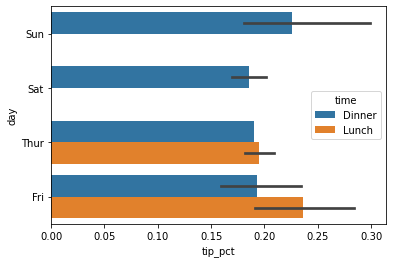

In [59]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

<AxesSubplot:xlabel='size', ylabel='count'>

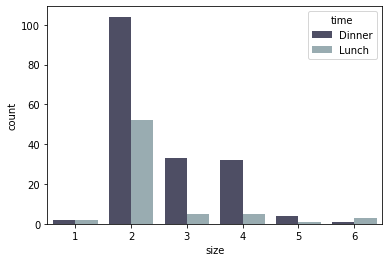

In [61]:
# sns.countplot()
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', hue='time', data=tips, palette='bone')

<AxesSubplot:ylabel='Frequency'>

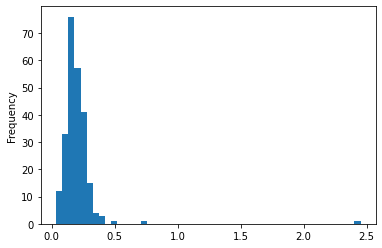

In [62]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

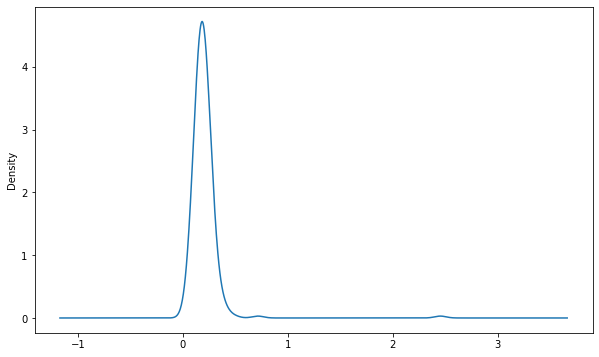

In [19]:
tips.tip_pct.plot.density()

In [4]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.983885
std        5.224922
min       -2.250755
25%       -0.009537
50%        3.825022
75%       10.082883
max       16.574928
dtype: float64

<AxesSubplot:ylabel='Density'>

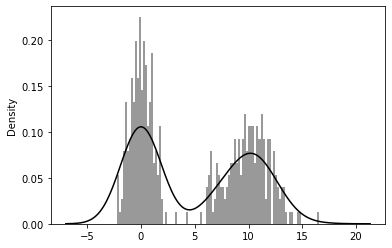

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(values, bins=100, color='k') # kde=False
# sns.histplot(values, bins=100, color='k',kde=False)

In [9]:
# 물고기 종류별 몸길이 데이터
fish_multi = pd.read_csv("./dataset/4_fm2.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


<AxesSubplot:xlabel='length', ylabel='Density'>

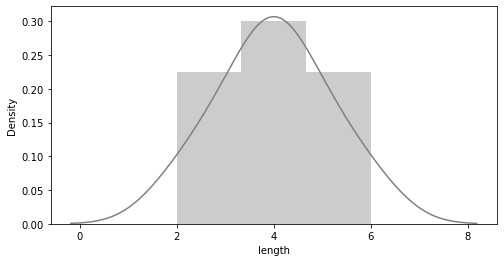

In [27]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.distplot(length_a,color='gray')

<AxesSubplot:xlabel='length'>

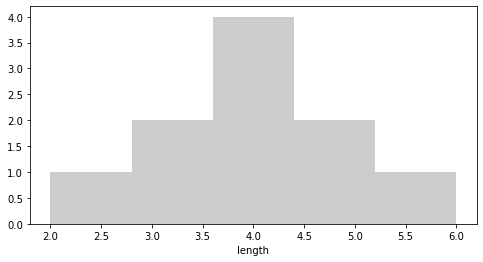

In [28]:
sns.distplot(length_a, bins=5,color='gray',kde=False)

<AxesSubplot:xlabel='species', ylabel='length'>

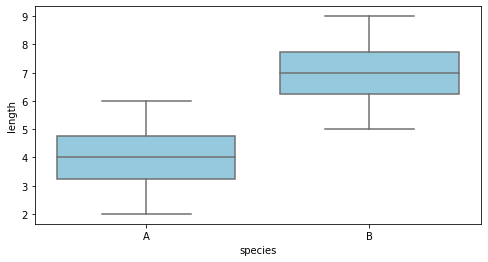

In [30]:
sns.boxplot(x='species', y='length', data=fish_multi, color= 'skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

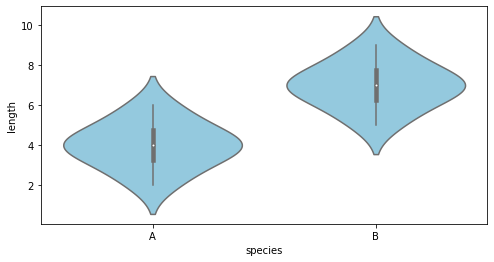

In [31]:
# 바이올린 플롯
# 상자그림의 상자 대신 커널밀도추정의 결과를 사용
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [32]:
fish_multi = pd.read_csv("dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

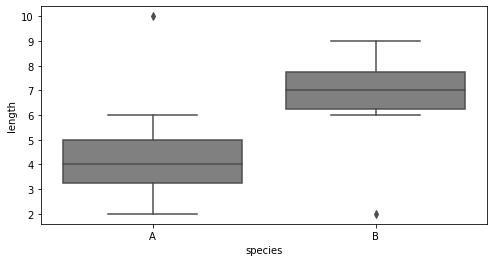

In [33]:
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

Q. fish_multi에서 이상치를 제거한 후 바이올린 플롯을 표현하세요.

In [35]:
fm1 = fish_multi[fish_multi.species=='A']['length']
fm2 = fish_multi[fish_multi.species=='B']['length']

print(fm1.describe())
print(fm2.describe())
iqr = 5 - 2
uw_check = 5 + 1.5*iqr
print(uw_check)
st = np.sort(fm1)[::-1]
print('이상치: {}'.format(st[st>uw_check]))
print()
iqr = 7.75 - 6.25
lw_check = 6.25-1.5*iqr
print(lw_check)
st = np.sort(fm2)
print('이상치: {}'.format(st[st<lw_check]))

count    10.000000
mean      4.600000
std       2.221111
min       2.000000
25%       3.250000
50%       4.000000
75%       5.000000
max      10.000000
Name: length, dtype: float64
count    10.000000
mean      6.700000
std       1.888562
min       2.000000
25%       6.250000
50%       7.000000
75%       7.750000
max       9.000000
Name: length, dtype: float64
9.5
이상치: [10]

4.0
이상치: [2]


In [40]:
index_fm = fish_multi[((fish_multi.length==10) & (fish_multi.species =='A')) | \
                      ((fish_multi.length==2) & (fish_multi.species =='B'))].index

<AxesSubplot:xlabel='species', ylabel='length'>

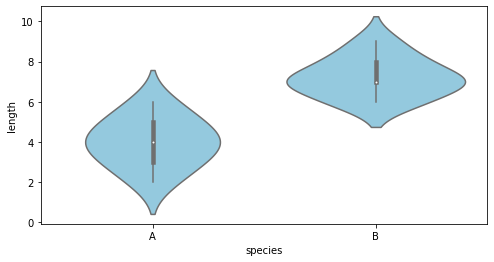

In [41]:
fm2 = fish_multi.drop(index_fm)
fm2
sns.violinplot(x='species',y='length',
              data = fm2, color= 'skyblue')

In [12]:
cov_data = pd.read_csv('./dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


<Figure size 360x360 with 0 Axes>

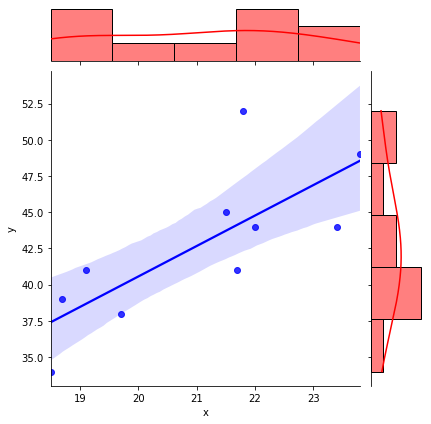

In [16]:
# fig = plt.figure(figsize=(3,2))
plt.figure(figsize=(5,5))
sns.jointplot(cov_data.x, cov_data.y, kind='reg',
             joint_kws={'color':'blue'},
             marginal_kws={'color':'red'})

In [64]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


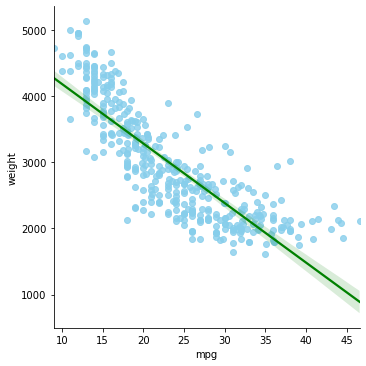

In [65]:
sns.lmplot(x='mpg', y='weight', data=df_auto, scatter_kws={'color':'skyblue'},\
          line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

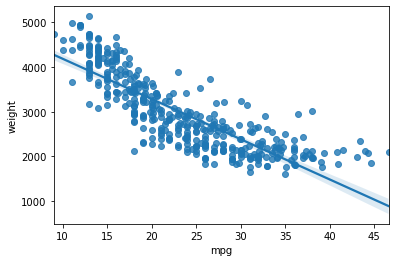

In [66]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

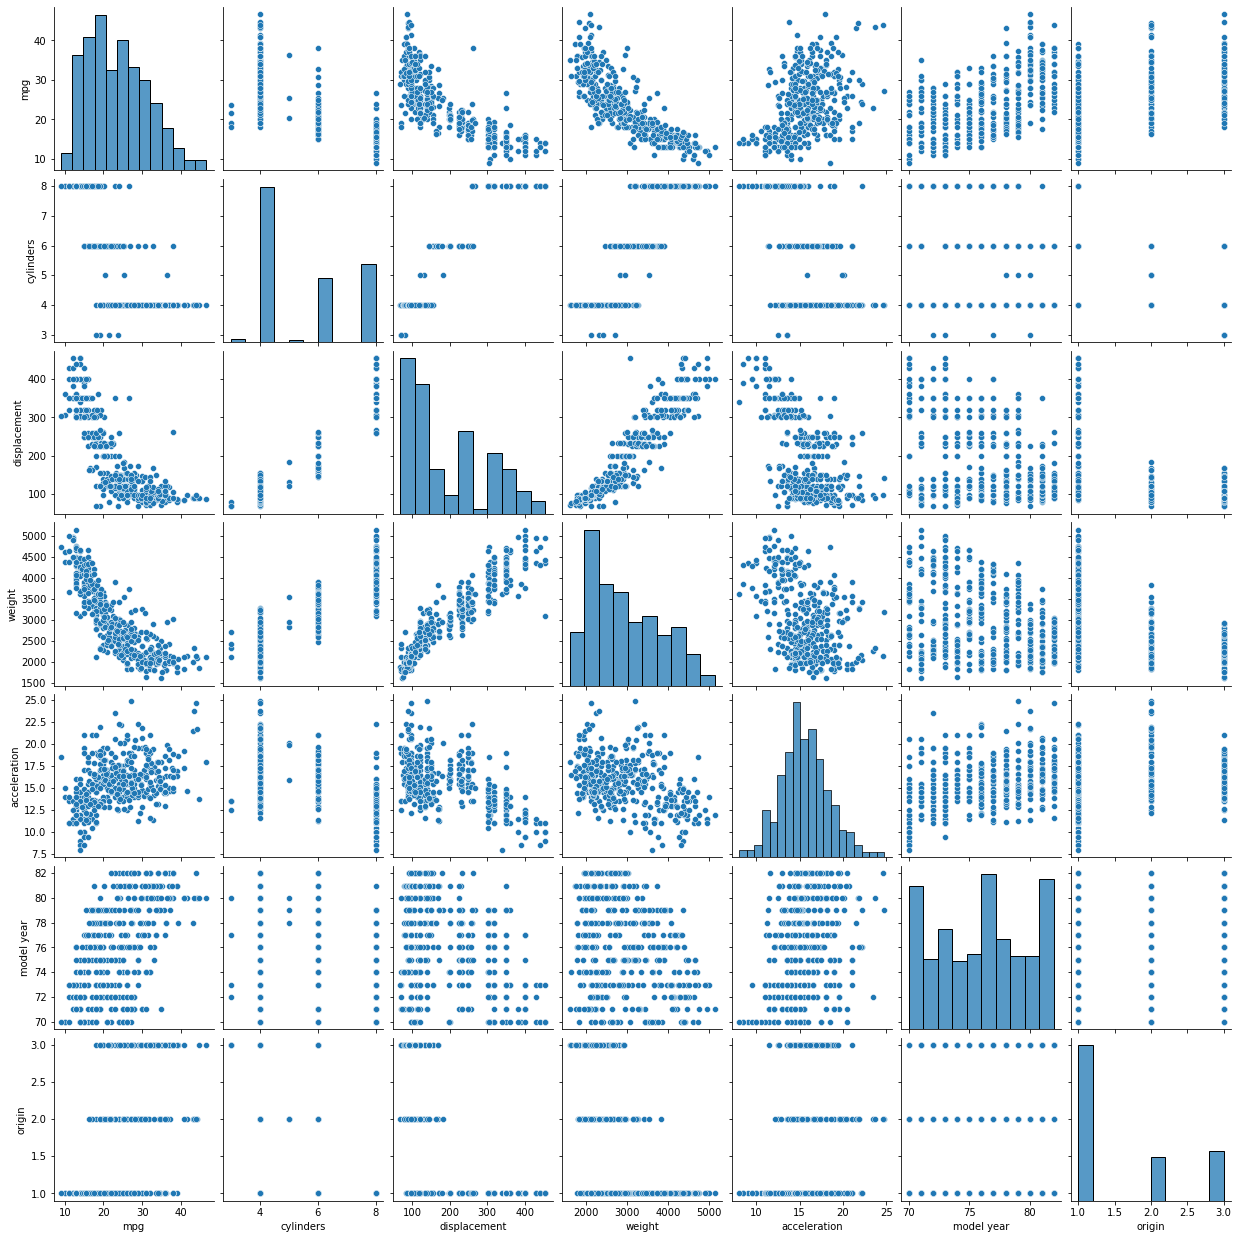

In [67]:
sns.pairplot(df_auto,palette='gray')

In [22]:
t_df = sns.load_dataset('titanic')
t_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

            pclass       age      fare     sibsp     parch  survived
pclass    1.000000 -0.369226 -0.549500  0.083081  0.018443 -0.338481
age      -0.369226  1.000000  0.096067 -0.308247 -0.189119 -0.077221
fare     -0.549500  0.096067  1.000000  0.159651  0.216225  0.257307
sibsp     0.083081 -0.308247  0.159651  1.000000  0.414838 -0.035322
parch     0.018443 -0.189119  0.216225  0.414838  1.000000  0.081629
survived -0.338481 -0.077221  0.257307 -0.035322  0.081629  1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

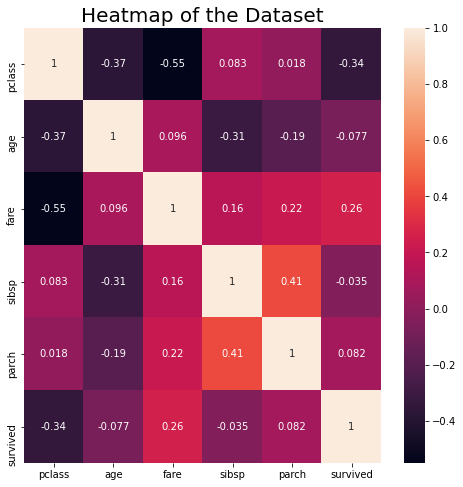

In [31]:
data = t_df[['pclass','age','fare','sibsp', 'parch','survived']].corr()
print(data)
plt.figure(figsize=(8,8))
sns.heatmap(t_df[['pclass','age','fare','sibsp', 'parch','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [32]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],\
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

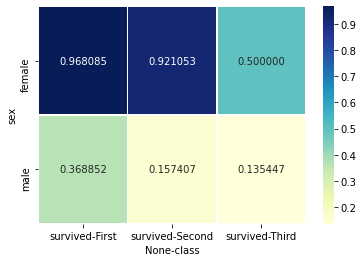

In [75]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

In [ ]:
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])

Q. fish_data로 다음을 수행하세요.
- 히스토그램을 표현하세요.
- 밀도 그래프를 표현하세요.
- 히스토그램과 커널밀도함수를 그래프로 같이 표현하세요.

<AxesSubplot:ylabel='Frequency'>

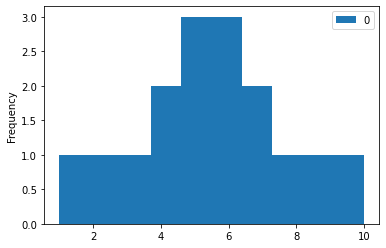

In [79]:
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])
df = pd.DataFrame(fish_data)
df.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

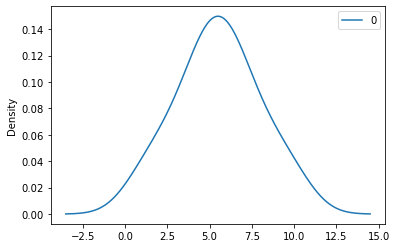

In [80]:
df.plot.density()

<AxesSubplot:ylabel='Density'>

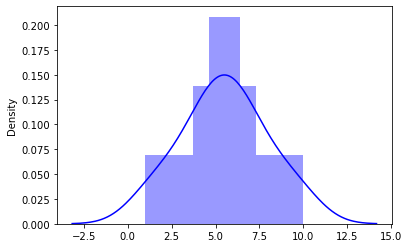

In [81]:
sns.distplot(fish_data, bins=10, color='blue',kde=True)

<AxesSubplot:ylabel='Count'>

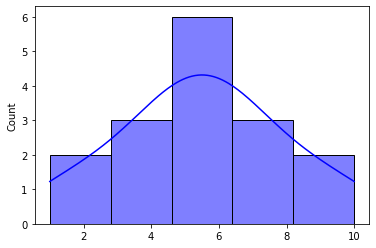

In [83]:
sns.histplot(fish_data,color='blue',kde=True)

Q. subplot 사용 밀도있는 그래프와 없는 그래프를 같이 표현하세요

<AxesSubplot:ylabel='Count'>

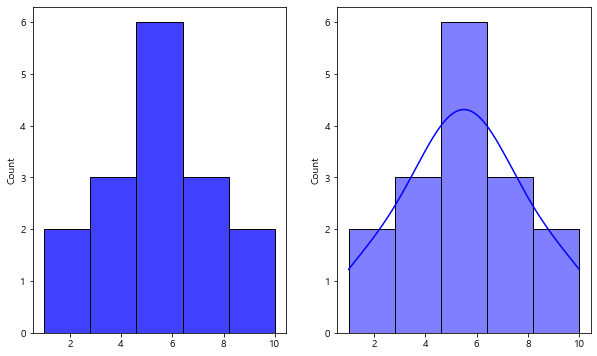

In [89]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data,color='blue',kde=False,ax=ax1)
sns.histplot(fish_data,color='blue',kde=True,ax=ax2)

Q. 'dataset/4_fm2.csv'를 데이터프레임으로 불러와서 아래와 같이 Box Plot을 표현하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_f=pd.read_csv('dataset/4_fm2.csv')
df_f

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


Text(0.5, 1.0, 'Species별 length 분포(수평 박스 플롯)')

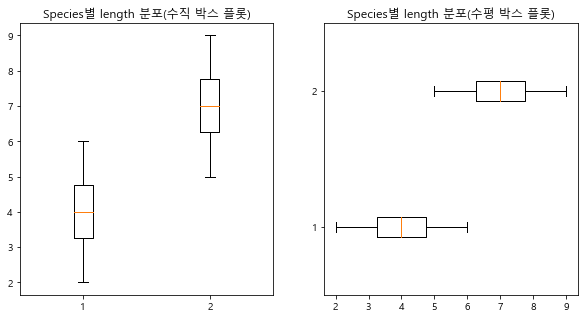

In [3]:
df_f=pd.read_csv('dataset/4_fm2.csv')

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']])
ax2.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']],vert=False)
ax1.set_title('Species별 length 분포(수직 박스 플롯)')
ax2.set_title('Species별 length 분포(수평 박스 플롯)')

Text(0.5, 1.0, 'Species별 length 분포(수평 박스 플롯)')

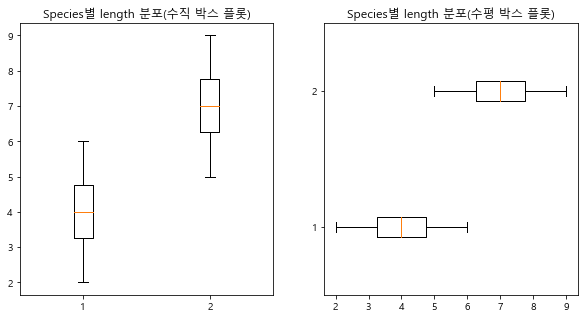

In [21]:
data = pd.read_pickle('dataset/fifa_data.pkl')
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Q. 'Preferred Foot'의 빈도를 표시하는 막대 그래프를 표현하세요.

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

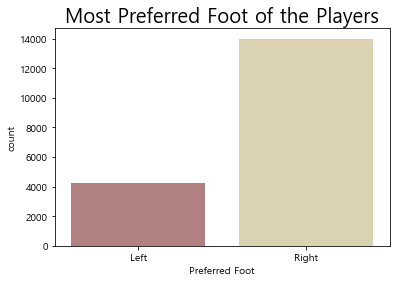

In [10]:
import warnings
warnings.filterwarnings('ignore')
data.columns
data['Preferred Foot'].value_counts()
sns.countplot(data['Preferred Foot'],palette='pink')
plt.title('Most Preferred Foot of the Players', fontsize=20)

Text(0.5, 1.0, 'Comparison of Positions and Players')

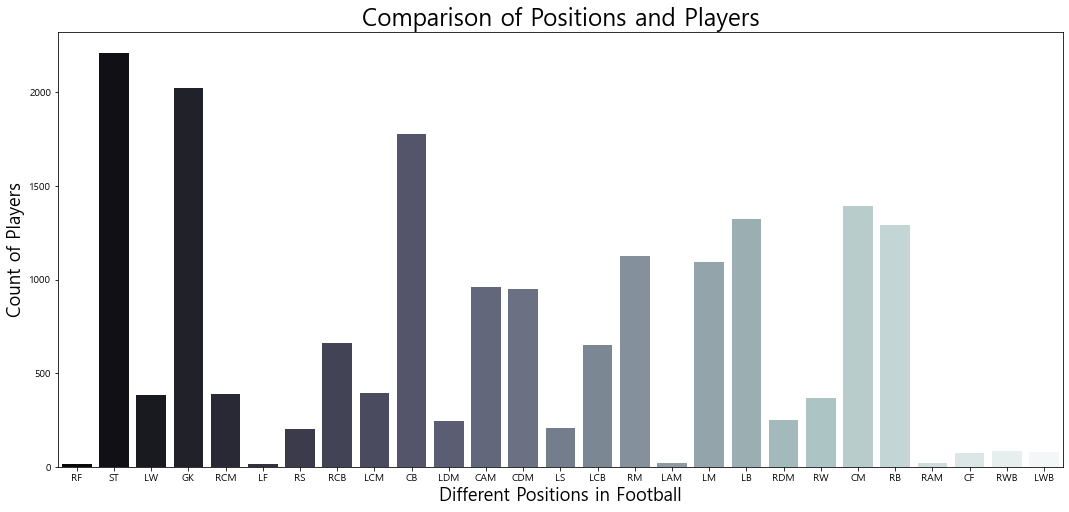

In [16]:
# Different position in Football
data.Position.value_counts()
plt.figure(figsize=(18,8))
ax = sns.countplot('Position', data=data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 18)
ax.set_ylabel(ylabel = 'Count of Players', fontsize=18)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 24)

Q. Weight 칼럼의 값들에서 무게 단위인 'lbs'를 삭제하고 소수점 첫째자리의 숫자로 변환하세요.

In [22]:
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)
data.Weight = data.Weight.apply(lambda x:extract_value_from(x))
data.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [30]:
# csv로 읽어오신 경우
def extract_value_from(value):
    out = str(value)+'lbs'
    return out
data.Weight = data.Weight.apply(lambda x:extract_value_from(x))
data.Weight.head()

0    159.0lbs
1    183.0lbs
2    150.0lbs
3    168.0lbs
4    154.0lbs
Name: Weight, dtype: object

In [31]:
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)
data.Weight = data.Weight.apply(lambda x:extract_value_from(x))
data.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

Q. Wage 칼럼의 값을 아래와 같이 변환하세요.
- €565K -> 565000.0

In [27]:
data.Wage.unique()
def extract_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

data.Wage = data.Wage.apply(lambda x: extract_value_from(x))
data.Wage.head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

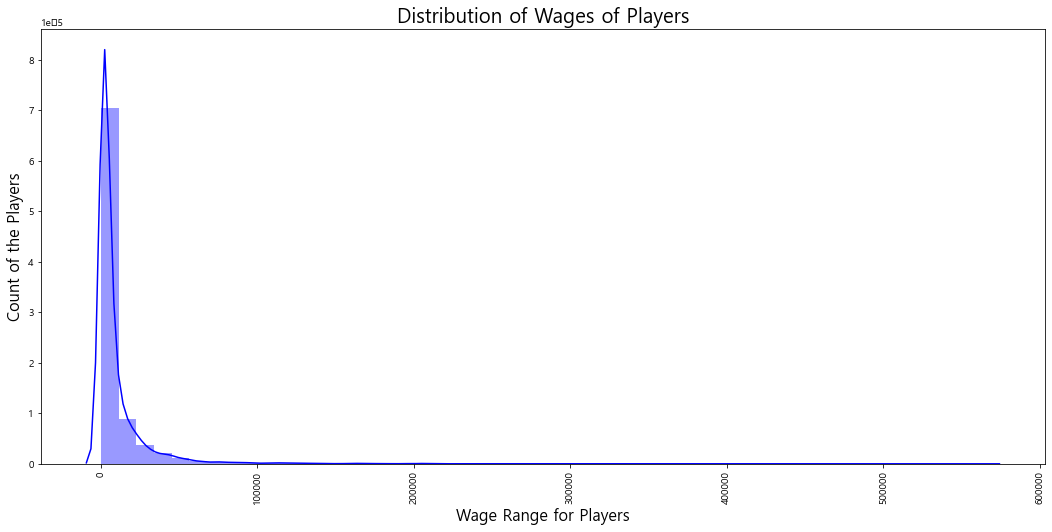

In [29]:
plt.figure(figsize=(18,8))
sns.distplot(data.Wage, color='blue')
plt.xlabel('Wage Range for Players', fontsize=16)
plt.ylabel('Count of the Players', fontsize=16)
plt.title('Distribution of Wages of Players', fontsize=20)
plt.xticks(rotation=90)

In [33]:
df = pd.read_csv('dataset/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [34]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [35]:
def extract_value_from(a,b):
    return b - a

df['OP'] = df.apply(lambda x:extract_value_from(x['Overall'],x['Potential']),axis=1)
df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,OP
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,1


In [37]:
df.shape
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [ ]:
# The goal is to use the player's attributes to predict his annual wage in dollars

In [39]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
OP                   0
Length: 89, dtype: int64

In [40]:
df.Wage.value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€93K        1
€405K       1
€190K       1
€565K       1
€300K       1
Name: Wage, Length: 144, dtype: int64

In [42]:
# Top 20 players by potential
ply = df.sort_values('Potential',ascending=False)[['Name','Age','Value','Overall',\
                                                  'Potential']].head(20)
ply.head()

,Name,Age,Value,Overall,Potential
25,K. Mbappé,19,€81M,88,95
0,L. Messi,31,€110.5M,94,94
15,P. Dybala,24,€89M,89,94
1,Cristiano Ronaldo,33,€77M,94,94
2,Neymar Jr,26,€118.5M,92,93


<AxesSubplot:xlabel='Potential', ylabel='Name'>

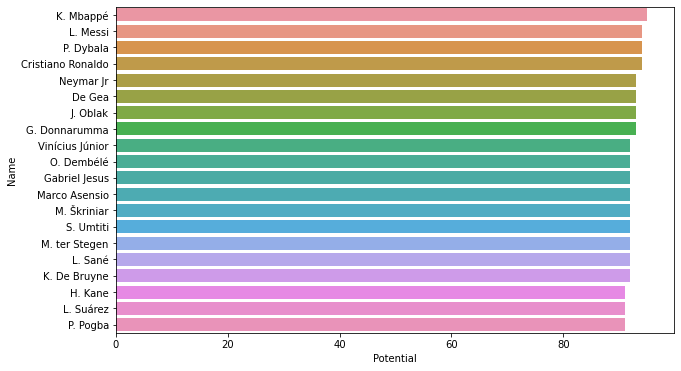

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='Potential',y='Name',data=ply,orient='h')

Q. €110.5M -> 110500000.0 로 변환 후 Value 칼럼의 분포를 그래프로 표현하세요

In [46]:
def extract_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

df.Value = df.Value.apply(lambda x: extract_value_from(x))
df.Value.head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value'>

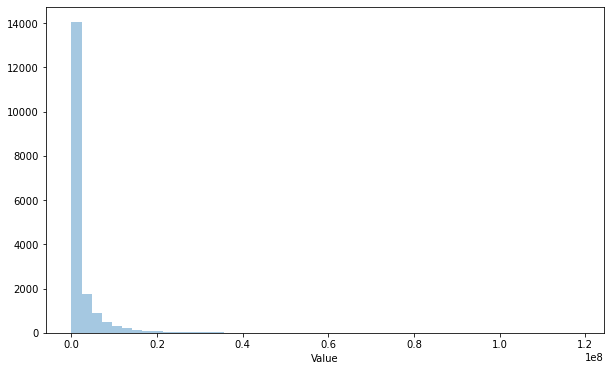

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(df.Value,kde=False)

In [51]:
# the average value for every age in the dataset
age = df.groupby('Age')['Value'].mean().reset_index()
age.head()

,Age,Value
0,16,2.164286e+05
1,17,4.047059e+05
2,18,5.319672e+05
3,19,9.098193e+05
4,20,1.233161e+06


<AxesSubplot:xlabel='Age', ylabel='Value'>

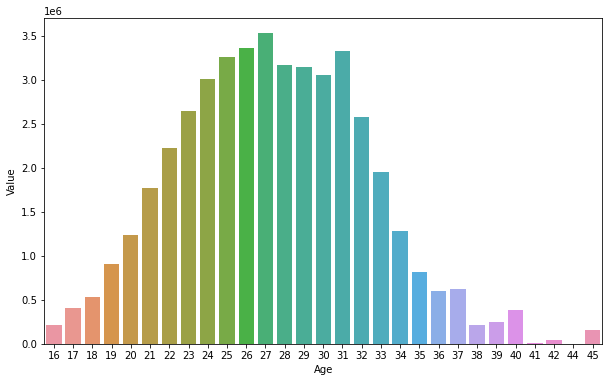

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Value',data=age,orient='v')

<AxesSubplot:xlabel='Age', ylabel='count'>

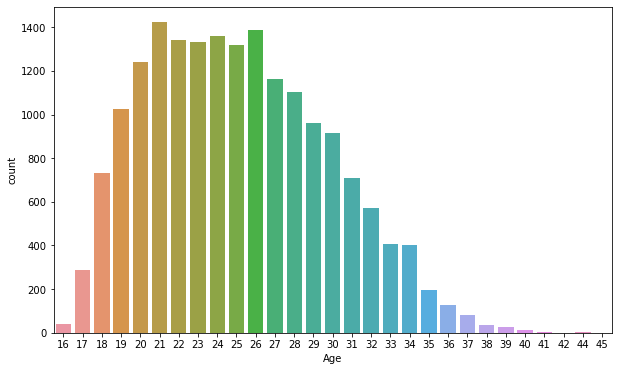

In [56]:
# countplot
plt.figure(figsize=(10,6))
sns.countplot('Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

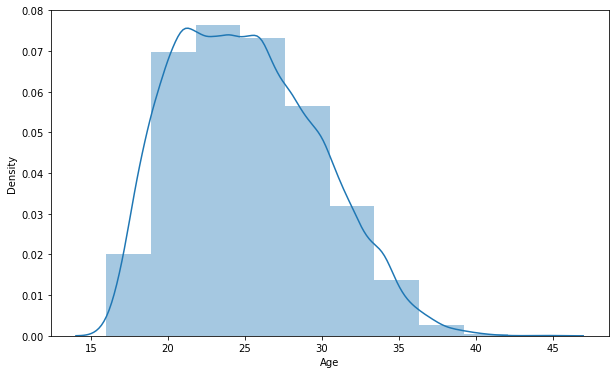

In [57]:
# age의 분포 및 밀도그래프
plt.figure(figsize=(10,6))
sns.distplot(df.Age, bins=10,kde=True)

                  Club         Value
326           Juventus  2.817900e+07
470        Real Madrid  2.649773e+07
212       FC Barcelona  2.583636e+07
374    Manchester City  2.383500e+07
214  FC Bayern München  2.341466e+07


<AxesSubplot:xlabel='Value', ylabel='Club'>

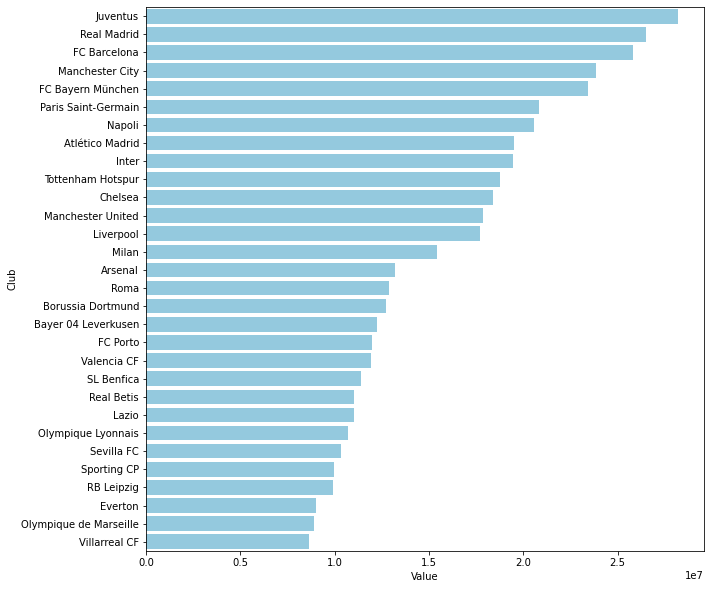

In [59]:
# Top 30 teams with highest player's average value
lub = df.groupby('Club')['Value'].mean().reset_index().sort_values('Value',\
                                                                   ascending=False).head(30)
print(lub.head())
plt.figure(figsize=(10,10))
sns.barplot(x='Value',y='Club',data=lub,color='skyblue',orient='h')

            Club    Overall
326     Juventus  82.280000
398       Napoli  80.000000
315        Inter  79.750000
470  Real Madrid  78.242424
382        Milan  78.074074


<AxesSubplot:xlabel='Overall', ylabel='Club'>

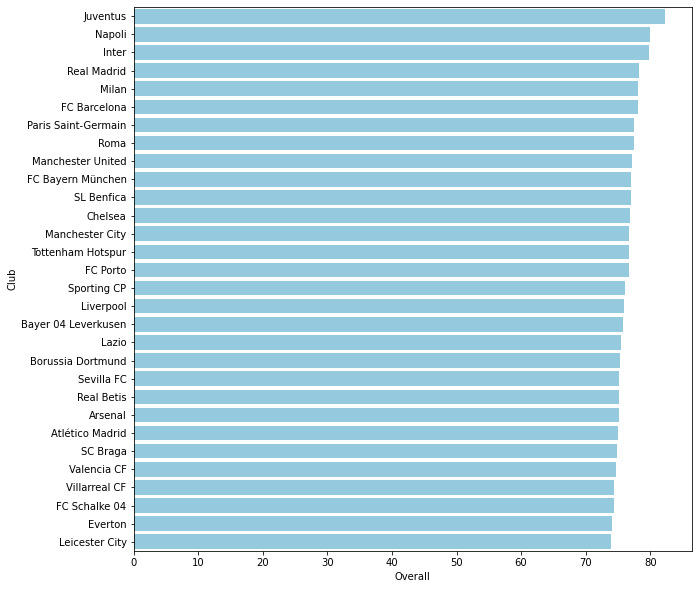

In [60]:
# Top 30 teams with highest player's average Overall rating
club = df.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', \
                                                                      ascending=False).head(30)
print(club.head())
plt.figure(figsize=(10,10))
sns.barplot(x='Overall',y='Club',data=club,color='skyblue',orient='h')

Q. Club Data를 출력하는 사용자 함수를 만든 후 "Manchester United" 데이터 출력  
출력 칼럼 : ['Name','Jersey Number', 'Position','Overall','Nationality','Age','Wage','Value','Contract Valid Until']

In [61]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,OP
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,1


In [62]:
def club(x):
    return df[df['Club']==x][['Name','Jersey Number', 'Position','Overall',\
                               'Nationality','Age','Wage','Value','Contract Valid Until']]
mu = club("Manchester United")
mu.head()

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
3,De Gea,1.0,GK,91,Spain,27,€260K,72000000.0,2020
45,P. Pogba,6.0,RDM,87,France,25,€210K,64000000.0,2021
47,R. Lukaku,9.0,ST,87,Belgium,25,€230K,62500000.0,2022
93,A. Sánchez,7.0,RW,85,Chile,29,€215K,37500000.0,2022
116,A. Martial,11.0,LW,84,France,22,€165K,42500000.0,2019
